In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle, Arc

In [2]:
#Appending datasets for each team into one large dataset
#Reading shot data csv into pandas dataframe
teams = ["MIA", "WAS", "TOR", "PHI", "ORL", 
         "NYK", "MIL", "ATL", "IND", "CLE", 
         "BOS", "NJN", "CHI", "CHA", "DET", 
         "MEM", "DEN", "DAL", "MIN", "NOH", 
         "GSW", "OKC", "LAL", "LAC", "PHO", 
         "POR", "SAC", "SAS", "UTA", "HOU"]

team_data = pd.DataFrame()
for team in teams:
    team_data = pd.concat([team_data, pd.read_csv(f"data/{team}.csv")])
print("Team Data")
print(team_data)

shot_data = pd.read_csv("data/NBAShotLocations1997-2020.csv")
shot_data.dropna(subset=['Game Date', 'X Location', 'Y Location'])
print("Shot Data")
print(shot_data)

Team Data
    Unnamed: 0   Season   Lg   Tm   W   L Finish  Unnamed: 6   Age  Ht.  ...  \
0            0  2021-22  NBA  MIA  53  29      1         NaN  28.2  6-5  ...   
1            1  2020-21  NBA  MIA  40  32      2         NaN  27.4  6-6  ...   
2            2  2019-20  NBA  MIA  44  29      1         NaN  25.9  6-6  ...   
3            3  2018-19  NBA  MIA  39  43      3         NaN  27.0  6-7  ...   
4            4  2017-18  NBA  MIA  44  38      1         NaN  26.5  6-6  ...   
..         ...      ...  ...  ...  ..  ..    ...         ...   ...  ...  ...   
52          52  1971-72  NBA  HOU  34  48      4         NaN  24.6  6-5  ...   
53          53  1970-71  NBA  SDR  40  42      3         NaN  25.0  6-5  ...   
54          54  1969-70  NBA  SDR  27  55      7         NaN  25.3  6-5  ...   
55          55  1968-69  NBA  SDR  37  45      4         NaN  25.1  6-5  ...   
56          56  1967-68  NBA  SDR  15  67      6         NaN  26.4  6-5  ...   

     FT%  ORB   DRB   TRB   A

In [38]:
#https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
#Link to code used to draw court onto graph
#Our team did not write this code

def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [42]:
#Function used to plot the shots onto a graph using the X and Y Location provided by the data
#Params: data -> filtered data, color -> color of graph, alpha -> transparency of each data point
#        year -> year in which data is describing, player -> player in which data is for
#        reg_or_playoff -> whether the game type is regular season, playoffs, or both

def plot_map(data, color, size, alpha, year, player):
    #Using a seaborn relplot to plot all the points using their X and Y location
    sns.relplot(data = data, x = "X Location", y = "Y Location",\
                color = color, size = size, alpha = alpha, legend = False)
    
    #Setting the title of the graph
    plt.title(str(player) + " Shot Distribution in " +\
              str(year))
    #Removing the x and y axes from the graph to make it look more like a basketball court
    plt.axis("off")
    #Setting the x and y limits to keep the shape of the court uniform for any shot distribution
    plt.xlim(-250, 250)
    plt.ylim(-50, 450)
    
    draw_court()
    plt.savefig(str(player)+str(year)+'heatmap.png', bbox_inches='tight')

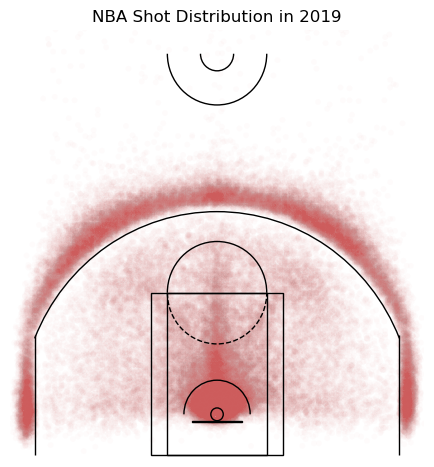

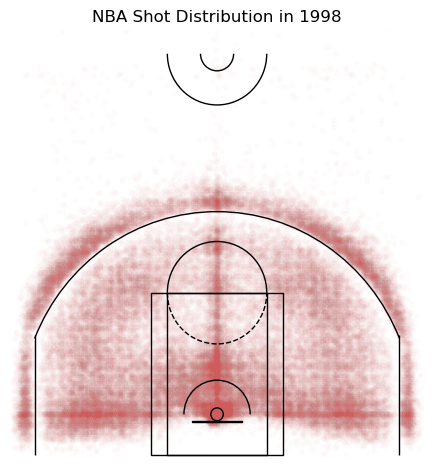

In [41]:
#2019 Shot Chart
plot_map(data = shot_data[shot_data["Game Date"].astype(str).str.startswith("2019")].head(100000), 
         color = "indianred", 
         size = 0.01, 
         alpha = 0.02, 
         year = 2019, 
         player = "NBA")
#1998 Shot Chart
plot_map(data = shot_data[shot_data["Game Date"].astype(str).str.startswith("1998")].head(100000),
         color = "indianred", 
         size = 0.01, 
         alpha = 0.02, 
         year = 1998, 
         player = "NBA")